# Julia Unfold test

## Create Julia enviroment

This will install Julia lang in the current enviroment, if not installed yet.

In [1]:
# Import the Julia package manager
from juliacall import Pkg as jlPkg

# Activate the environment in the current folder
jlPkg.activate(".")

# Check the status of the environment/installed packages -> will be empty at the beginning
print(jlPkg.status())

# Install Julia packages
jlPkg.add("Unfold")
jlPkg.add("DataFrames")
jlPkg.add("CSV")
jlPkg.add("UnfoldMakie")
jlPkg.add("CairoMakie")
jlPkg.add("StatsModels")
jlPkg.add("MixedModels")
jlPkg.add("DSP")

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/Projects/neuroNoodle`
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/Project.toml`
  No Changes to `~/Projects/neuroNoodle/Manifest.toml`


Status `~/Projects/neuroNoodle/Project.toml`
  [336ed68f] CSV v0.10.14
  [13f3f980] CairoMakie v0.12.5
  [717857b8] DSP v0.7.9
  [a93c6f00] DataFrames v1.6.1
  [ff71e718] MixedModels v4.25.1
  [3eaba693] StatsModels v0.7.3
  [181c99d8] Unfold v0.7.4
  [69a5ce3b] UnfoldMakie v0.5.4
None


Precompiling project...
  ✓ CodecZlib
  ✓ Automa
  ✓ MathTeXEngine
  ✓ CSV
  ✓ Makie
  ✓ MakieThemes
  ✓ TopoPlots
  ✓ CairoMakie
  ✓ AlgebraOfGraphics
  ✓ UnfoldMakie
  10 dependencies successfully precompiled in 58 seconds. 334 already precompiled.
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/Project.toml`
  No Changes to `~/Projects/neuroNoodle/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/Project.toml`
  No Changes to `~/Projects/neuroNoodle/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/Project.toml`
  No Changes to `~/Projects/neuroNoodle/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/Project.toml`
  No Changes to `~/Projects/neuroNoodle/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Projects/neuroNoodle/Project.toml`
  No Changes to `~/Projects/neuroNoodle/Manifest.toml`
   Resolving package versions...
  No C

Import Julia packages

In [2]:
from juliacall import Main as jl

jl.seval("using DataFrames")
jl.seval("using Unfold")
jl.seval("using UnfoldMakie, CairoMakie")
jl.seval("using StatsModels")
jl.seval("using MixedModels")

Unfold = jl.Unfold

jl.seval("include(joinpath(dirname(pathof(Unfold)), \"../test/test_utilities.jl\"))") # to load data

gen_noise_exp (generic function with 1 method)

Import Python packages

In [3]:
from mne.datasets.limo import load_data
import pandas as pd
import seaborn as sns
import numpy as np
from mne import combine_evoked
from mne.datasets.limo import load_data
from mne.stats import linear_regression
from mne.viz import plot_compare_evokeds, plot_events
import matplotlib.pyplot as plt

## Load example dataset

In [4]:
dat, evts = jl.seval("loadtestdata(\"test_case_4b\")")

<Axes: >

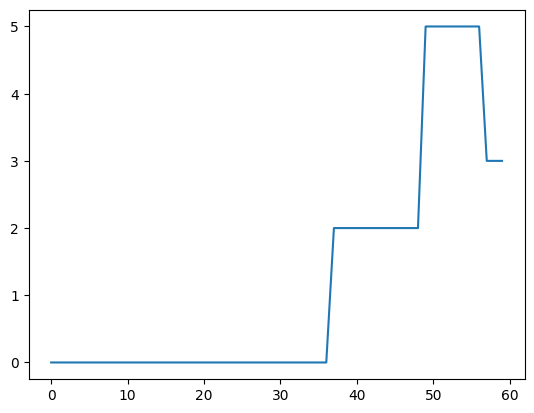

In [5]:
dat_py = list(dat)
sns.lineplot(dat_py[:60])

In [6]:
events = pd.DataFrame({
    'latency': evts.latency,
    'type': evts.type,
    'intercept': evts.intercept,
})
events['type'] = events['type'].map(lambda x: list(x)[-1])

events

,latency,type,intercept
0,38,A,1
1,50,B,1
2,89,A,1
3,102,B,1
4,144,A,1
...,...,...,...
447,11870,B,1
448,11908,A,1
449,11919,B,1
450,11959,A,1


## Specify formulas and basisfunctions

In [14]:
bf1 = jl.seval("bf1 = firbasis(τ = (-0.4, 0.8), sfreq = 50)")
bf2 = jl.seval("bf2 = firbasis(τ = (-0.2, 1.2), sfreq = 50)")

In [15]:
bf1

╭──────────────────────────────────────────────────────────────────────────────╮61×61 SparseArrays.SparseMatrixCSC with 61 stored entries:
│  ::BasisFunction                                                             │⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤                                    
│  name:                                                                       │⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  kerneltype: FIRBasis                                                        │⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  width: 61                                                                   │⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  height: 61                                                                  │⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  colnames: [-0.4, -0.38 ... 0.8]                                             │⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  times: [-0.4, -0.38 ... 

In [29]:
formula = jl.seval("f = @formula 0 ~ 1")

In [30]:
bfDict = jl.seval("[ \"eventA\" => (f, bf1), \"eventB\" => (f, bf2) ]")

In [31]:
bfDict

2-element Vector{Pair{String, Tuple{FormulaTerm{ConstantTerm{Int64}, ConstantTerm{Int64}}, FIRBasis}}}:
 "eventA" => (0 ~ 1, ╭──────────────────────────────────────────────────────────────────────────────╮61×61 SparseArrays.SparseMatrixCSC with 61 stored entries:
│  ::BasisFunction                                                             │⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤                                    
│  name:                                                                       │⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  kerneltype: FIRBasis                                                        │⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  width: 61                                                                   │⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  height: 61                                                                  │⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥                                    
│  colnames: [-0.4, -0.38 ... 0.8]       

In [32]:
m = Unfold.fit(
    Unfold.UnfoldModel,
    bfDict,
    evts,
    dat,
    solver = jl.seval("(x, y) -> Unfold.solver_default(x, y; stderror = true)"),
    eventcolumn = "type",
)

┌ Warning: Autocorrelation was NOT taken into account. Therefore SE are UNRELIABLE. Use at your own discretion
└ @ Unfold ~/.julia/packages/Unfold/JAWHv/src/solver.jl:105


In [37]:
results_jl = Unfold.coeftable(m)
results_jl

Row,channel,coefname,estimate,eventname,group,stderror,time
,Int64,String,Float64,String,Nothing,Float64,Float64
1,1,(Intercept),9.06264e-6,eventA,,5.63335e-7,-0.4
2,1,(Intercept),1.1673e-5,eventA,,5.88822e-7,-0.38
3,1,(Intercept),1.42016e-5,eventA,,6.16774e-7,-0.36
4,1,(Intercept),1.71274e-5,eventA,,6.44325e-7,-0.34
5,1,(Intercept),2.03351e-5,eventA,,6.70065e-7,-0.32
6,1,(Intercept),2.20114e-5,eventA,,6.92966e-7,-0.3
7,1,(Intercept),2.43435e-5,eventA,,7.13584e-7,-0.28
8,1,(Intercept),2.59797e-5,eventA,,7.32118e-7,-0.26
9,1,(Intercept),2.70265e-5,eventA,,7.48873e-7,-0.24


In [41]:
np.unique(results_py_df['coefname'].to_list())

array(['(Intercept)'], dtype='<U11')

In [39]:
# Transfer results back to Python
results_py_df = pd.DataFrame({
    'channel': results_jl.channel,
    'coefname': results_jl.coefname,
    'estimate': results_jl.estimate,
    'eventname': results_jl.eventname,
    'group': results_jl.group,
    'stderror': results_jl.stderror,
    'time': results_jl.time
})

results_py_df.head()

,channel,coefname,estimate,eventname,group,stderror,time
0,1,(Intercept),0.000009,eventA,None,5.633354e-07,-0.40
1,1,(Intercept),0.000012,eventA,None,5.888224e-07,-0.38
2,1,(Intercept),0.000014,eventA,None,6.167740e-07,-0.36
3,1,(Intercept),0.000017,eventA,None,6.443252e-07,-0.34
4,1,(Intercept),0.000020,eventA,None,6.700652e-07,-0.32


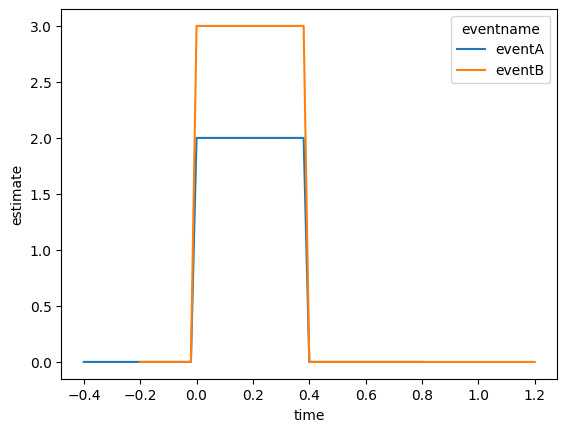

In [42]:
# Extract the coefficients for one channel
results_ch = results_py_df[results_py_df.channel == 1]

# Plot the coefficient estimates over time
ax = sns.lineplot(x = results_ch.time,y=results_ch.estimate,hue=results_ch.eventname)
# ax.set(xlabel='Time [s]', ylabel='Coefficient estimate', title='Model results');

---
JULIA

In [47]:
jl.seval("dat, evts = loadtestdata(\"test_case_4b\")")

(Julia:
 12000-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0,
 Julia:
 452×3 DataFrame
  Row │ latency  type     intercept
      │ Int64    String7  Int64
 ─────┼─────────────────────────────
    1 │      38  eventA           1
    2 │      50  eventB           1
    3 │      89  eventA           1
    4 │     102  eventB           1
    5 │     144  eventA           1
    6 │     156  eventB           1
    7 │     199  eventA           1
   ⋮  │    ⋮        ⋮         ⋮
  446 │   11817  eventB           1
  447 │   11857  eventA           1
  448 │   11870  eventB           1
  449 │   11908  eventA           1
  450 │   11919  eventB           1
  451 │   11959  eventA           1
  452 │   11971  eventB           1
                    438 rows omitted)

In [54]:
jl.seval("basisfunction = firbasis(τ=(-0.4,.8),sfreq=100,name=\"stimulus\")")
jl.seval("f  = @formula 0~1+type")
jl.seval("bfDict = Dict(Any=>(f,basisfunction))")

Dict{DataType, Tuple{FormulaTerm{ConstantTerm{Int64}, Tuple{ConstantTerm{Int64}, Term}}, FIRBasis}} with 1 entry:
  Any => (0 ~ 1 + type, ╭───────────────────────────────────────────────…

In [56]:
jl.seval("m = fit(UnfoldModel,bfDict,evts,dat)")

┌ Warning: using `Dict(:A=>(@formula,times/basisfunction))` is deprecated, please use `[:A=>(@formula,times/basisfunction)]` from now on
└ @ Unfold ~/.julia/packages/Unfold/JAWHv/src/fit.jl:53


Unfold-Type: ::UnfoldLinearModelContinuousTime{{Float64}} 
  Any => stimulus: timeexpand(1 + type) for times [-0.4, -0.39 ... 0.8] 
 
✔ model is fit.  size(coefs) (1, 242) 
 


Useful functions: `design(uf)`, `designmatrix(uf)`, `coef(uf)`, `coeftable(uf)`Useful functions: `design(uf)`, `designmatrix(uf)`, `coef(uf)`, `coeftable(uf)`Useful functions: `design(uf)`, `designmatrix(uf)`, `coef(uf)`, `coeftable(uf)`

In [49]:
# jl.seval(" m = Unfold.fit(UnfoldModel, bfDict, evts, dat, solver = (x, y) -> Unfold.solver_default(x, y; stderror = true), eventcolumn = \"type\") ")

┌ Warning: Autocorrelation was NOT taken into account. Therefore SE are UNRELIABLE. Use at your own discretion
└ @ Unfold ~/.julia/packages/Unfold/JAWHv/src/solver.jl:105


Unfold-Type: ::UnfoldLinearModelContinuousTime{{Float64}} 
  eventA => eventA: timeexpand(1) for times [-0.4, -0.38 ... 0.8] 
  eventB => eventB: timeexpand(1) for times [-0.2, -0.18 ... 1.2] 
 
✔ model is fit.  size(coefs) (1, 132) 
 


Useful functions: `design(uf)`, `designmatrix(uf)`, `coef(uf)`, `coeftable(uf)`Useful functions: `design(uf)`, `designmatrix(uf)`, `coef(uf)`, `coeftable(uf)`Useful functions: `design(uf)`, `designmatrix(uf)`, `coef(uf)`, `coeftable(uf)`

In [57]:
jl.seval("results = coeftable(m)")

Row,channel,coefname,estimate,eventname,group,stderror,time
,Int64,String,Float64,Union…,Nothing,Nothing,Float64
1,1,(Intercept),-6.42602e-6,Any,,,-0.4
2,1,(Intercept),-8.07019e-6,Any,,,-0.39
3,1,(Intercept),-9.73977e-6,Any,,,-0.38
4,1,(Intercept),-1.08029e-5,Any,,,-0.37
5,1,(Intercept),-1.24047e-5,Any,,,-0.36
6,1,(Intercept),-1.30819e-5,Any,,,-0.35
7,1,(Intercept),-1.27299e-5,Any,,,-0.34
8,1,(Intercept),-1.29582e-5,Any,,,-0.33
9,1,(Intercept),-1.40523e-5,Any,,,-0.32


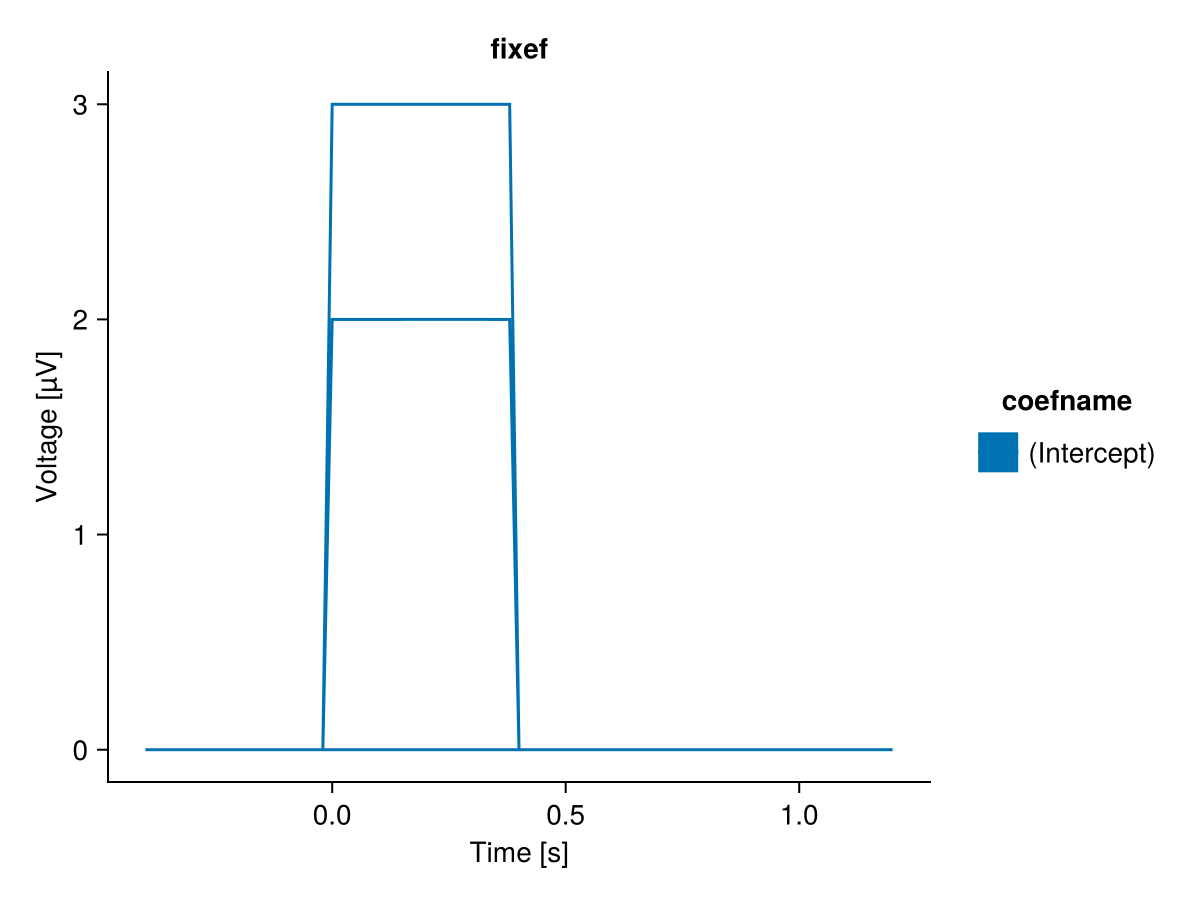

In [51]:
jl.seval("plot_erp(results; stderror = true, mapping = (; col = :group))")

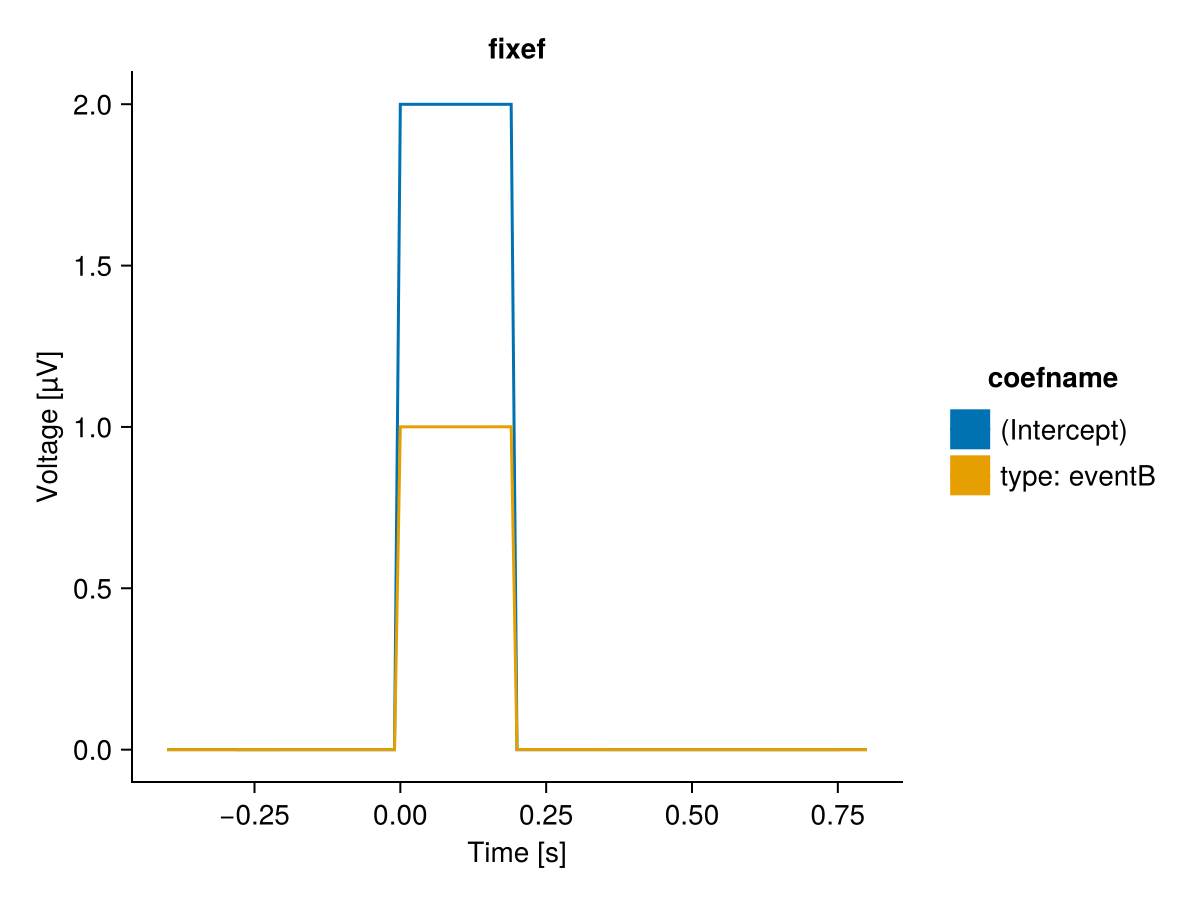

In [58]:
jl.seval("plot_erp(results; stderror = true, mapping = (; col = :group))")